In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
%matplotlib inline

### Problem 1
Write a function that accepts as input a callable function object `f`, an array of points `pts`, and a keyword argument `h` that defaults to `1e-5`. Return an array of the $centered$ $difference$ $quotients$ of `f` at each point in `pts` with the specified value of `h`.

In [2]:
def deriv(f, pts, h=1e-5):
    return 0.5*(f(pts+h)-f(pts-h))/h

### Problem 2.

Write a function that accepts as input a callable function object `f`, the derivative `df` of the function `f`, an array of points `pts`, and a keyword argument `h` that defaults to `1e-5`. Return an array of the errors for the centered difference quotients at each point in `pts` with the specified value of `h`.

In [3]:
def error_diff(f, df, pts, h=1e-5):
    deriv_est = deriv(f, pts, h)
    deriv_tru = df(pts)
    return deriv_est - deriv_tru

### Problem 3. 
Use the centered difference quotient to approximate the derivative of $f(x)=(sin(x)+1)^x$ at $x = \frac{\pi}{3}$, $\frac{\pi}{4}$,and $\frac{\pi}{6}$. Calculate the error of the approximations.

In [4]:
f = lambda x: (np.sin(x)+1)**x
df = lambda x: ((np.sin(x)+1)**x)*(((x*np.cos(x))/(np.sin(x)+1)) + np.log(np.sin(x)+1))
pts = np.pi*(np.array([3,4,6])**-1.)

In [5]:
#errors
error_diff(f, df, pts)

array([ -1.48328017e-11,  -1.39710465e-12,  -4.95758989e-12])

In [6]:
#center difference quotients
deriv(f, pts)

array([ 1.73807235,  1.30911398,  0.87516563])

In [7]:
# true derivatives
df(pts)

array([ 1.73807235,  1.30911398,  0.87516563])

### Problem 4. 
The radar stations $A$ and $B$, separated by the distance `a = 500 m`, track the plane $C$ by recording the angles $\alpha$ and $\beta$ at one-second intervals (See figure 8.1). Three successive readings are given in table 8.2. Use centered difference quotients to calculate the speed `v` of the plane at `t = 10 s`. The coordinates of the plane can be shown to be:

$$x = a\frac{tan(\beta)}{tan(\beta)-tan(\alpha)}$$

$$y = a\frac{tan(\beta)tan(\alpha)}{tan(\beta)- tan(\alpha)}$$

(Kiusalaas, Jaan. Numerical Methods in Engineering with Python 3)

In [8]:
a = 500
t = np.array([9,10,11])
alpha = np.deg2rad(np.array([54.80, 54.06, 53.34]))
beta = np.deg2rad(np.array([65.59, 64.59, 63.62]))

In [9]:
x = lambda alpha_,beta_: a*np.tan(beta_)/(np.tan(beta_) - np.tan(alpha_))
y = lambda alpha_,beta_: a*np.tan(beta_)*np.tan(alpha_)/(np.tan(beta_) - np.tan(alpha_))

In [10]:
x_pos = x(alpha, beta)
y_pos = y(alpha, beta)
print("X positions:", x_pos)
print("Y positions:", y_pos)

X positions: [ 1401.91839832  1450.49700629  1498.64035029]
Y positions: [ 1987.34601606  2000.84071299  2013.51241079]


In [11]:
distances = np.linalg.norm(np.vstack((x_pos, y_pos)), axis=0)
distances

array([ 2432.06072768,  2471.29624368,  2510.01098164])

In [12]:
#centered difference quotient
#h=1, x=10
#==> 0.5*(f(10+1) - f(10-1))/1
0.5*(distances[2]-distances[0])

38.975126980795949

### Problem 5.

Write a function that accepts 
1. a function handle f,
2. an integer `n` that is the dimension of the domain of `f`,
3. an integer `m` that is the dimension of the range of `f`,
4. an 1 x `n`-dimensional NumPy array `pt` representing a point in $R^n$, and
5. a keyword argument h that defaults to `1e-5`.

Return the approximate Jacobian matrix of f at `pt` using the centered difference quotient.

In [13]:
def jacobian(f, n, m, pt, h=1e-5):
    sbasis = np.eye(n)
    jacob = []
    for i in range(n):
        jacob.append(0.5*(f(pt+h*sbasis[i])-f(pt-h*sbasis[i]))/h)
    return np.array(jacob).T

In [14]:
f = lambda x: np.array([x[0]**(1/3) ,x[0]**2, x[0]+x[1]])
pt = np.array([1,2])
m = 3
n = 2

In [15]:
jacobian(f, n, m, pt)

array([[ 0.33333333,  0.        ],
       [ 2.        ,  0.        ],
       [ 1.        ,  1.        ]])

### Problem 6.

Let  $f : \mathbb{R}^2 \Rightarrow \mathbb{R}^2$ be defined by

$$f(x,y) = \begin{bmatrix}
            e^xsin(y)+y^3 \\
            3y-cos(x)
           \end{bmatrix}$$
           
Find the error between your Jacobian function and the analytically computed derivative on the square $[-1, 1]$ $\times$ $[-1, 1]$ using ten thousand grid points (100 per side). You may apply your Jacobian function to the points one at a time using a double for loop. Once you get the error matrix for a given point, calculate the Frobenius norm of this matrix (`la.norm` defaults to the Frobenius norm). This norm will be your total error for that point. What is the maximum error of your Jacobian function over all points in the square?

In [16]:
f = lambda x: np.array([np.exp(x[0])*np.sin(x[1]) +x[1]**3, 3*x[1] - np.cos(x[0])])
#analytical computed derivative
df = lambda x: np.array([[np.exp(x[0])*np.sin(x[1]), np.exp(x[0])*np.cos(x[1])+3*x[1]**2],
                           [np.sin(x[0]), 3]])

In [17]:
errors = []
for x in np.linspace(-1,1,100):
    for y in np.linspace(-1,1,100):
        pt = np.array([x,y])
        jacob_analytical = df(pt)
        jacob_numerderiv = jacobian(f, 2,2,pt)
        errors.append(la.norm(jacob_analytical-jacob_numerderiv))

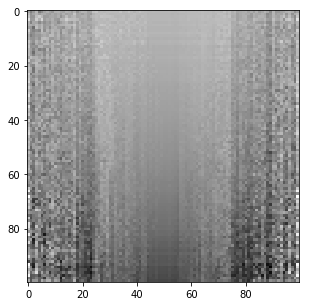

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(np.array(errors).reshape((100,100)), cmap = "gray")

In [19]:
np.max(errors)

1.2018346519324208e-10

In [20]:
np.sum(errors)

8.1800318519560781e-07